Import the necessary packages


In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data in a DataFrame and show the first 5 rows to inspect the DataFrame.

In [300]:
data = pd.read_csv("customer_booking.csv", encoding="latin-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


***Information about the dataframe***
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

Create a new dataframe from this one:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [301]:
data[["num_passengers","purchase_lead","length_of_stay","booking_origin","flight_duration","booking_complete"]][data["booking_complete"] == 1]

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1
...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1
49977,2,15,6,Malaysia,4.67,1
49980,4,242,6,Malaysia,5.00,1
49984,2,7,6,Australia,5.62,1


Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [302]:
data1 = pd.DataFrame(data.groupby("booking_origin")["purchase_lead"].mean().sort_values()).reset_index()
data1

,booking_origin,purchase_lead
0,Tanzania,10.000000
1,Vanuatu,11.000000
2,Israel,12.000000
3,Kenya,12.666667
4,Belarus,15.000000
...,...,...
99,Nicaragua,168.000000
100,Cyprus,172.500000
101,Afghanistan,191.000000
102,Bhutan,269.000000


Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

In [303]:
data2 = data.groupby("booking_origin").agg({"purchase_lead": "mean", "booking_complete": "sum"}).reset_index()
data2 = data2.sort_values(by="booking_complete", ascending=False)
data2

,booking_origin,purchase_lead,booking_complete
51,Malaysia,87.526206,2468
4,Australia,78.579622,900
17,China,80.353115,694
37,Indonesia,122.704095,615
43,Japan,79.916345,478
...,...,...,...
63,Norfolk Island,76.000000,0
67,Panama,57.000000,0
68,Papua New Guinea,38.000000,0
69,Paraguay,53.000000,0


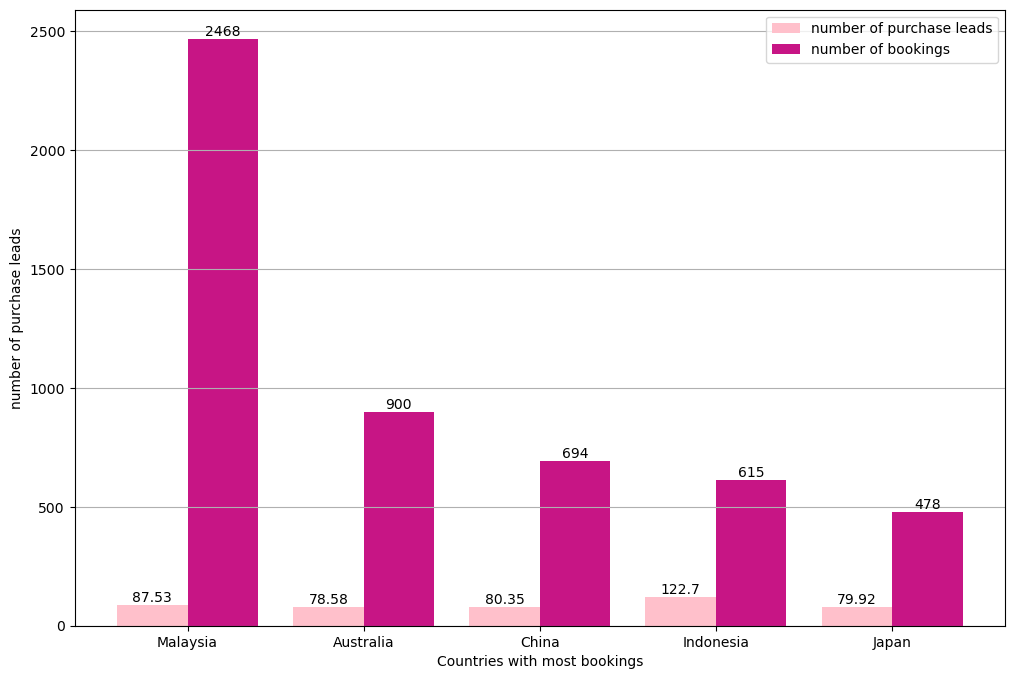

In [304]:
plt.figure(figsize=(12, 8))

bar_width = 0.4

x1 = range(len(data2["booking_origin"].iloc[:5]))
y1 = data2["purchase_lead"].iloc[:5]
bars1 = plt.bar(x1, y1, bar_width, color="pink", label="number of purchase leads")

x2 = [x + bar_width for x in x1]
y2 = data2["booking_complete"].iloc[:5]
bars2 = plt.bar(x2, y2, bar_width, color="mediumvioletred", label="number of bookings")

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks([x + bar_width/2 for x in x1], data2["booking_origin"].iloc[:5])

plt.xlabel("Countries with most bookings")
plt.ylabel("number of purchase leads")
plt.legend()
plt.grid(axis="y")